<a href="https://colab.research.google.com/github/Tesniya/pandas-numpy-seaborne/blob/main/model%20selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [7]:
df=pd.read_csv("/content/titanic_dataset .csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.shape

(891, 12)

891 rows or observations and 12 columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


total 12 features two are float, five are integers and five are object.

In [10]:
df["Ticket"].nunique()

681

In [11]:
df['Cabin'].nunique()

147

In [12]:
df.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)

In [13]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

<Axes: >

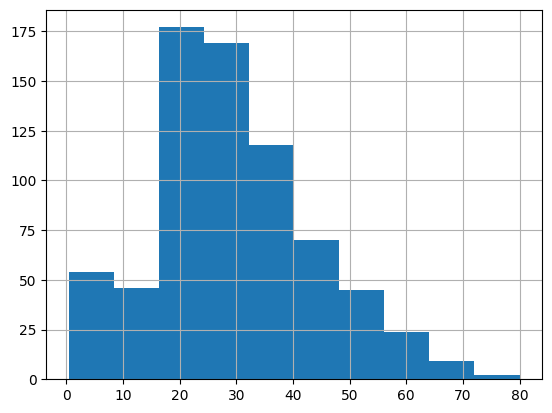

In [14]:
#histogram for age
df['Age'].hist()

In [15]:
#skewness of Age
df['Age'].skew()

0.38910778230082704

In [16]:
#Filling Null Values of Age with mean
df["Age"].fillna(dt['Age'].mean(),inplace=True)

In [18]:
#Finding the number of observation for each category of Embarked
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [24]:
#Filling Null value in Embarked
df['Embarked'].fillna(value="S",inplace=True)

In [25]:
#null values check
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [26]:
le = LabelEncoder()

In [27]:
df['Sex']=le.fit_transform(df['Sex'])

In [28]:
df['Embarked']=le.fit_transform(df['Embarked'])

In [29]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


<Axes: ylabel='Fare'>

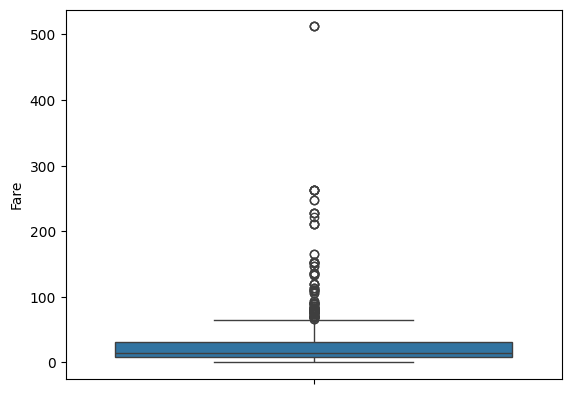

In [30]:
sns.boxplot(df['Fare'])

In [31]:
Q3=np.percentile(dt['Fare'],75,method='midpoint')
Q1=np.percentile(dt['Fare'],25,method='midpoint')
print(Q3)

31.0


In [32]:
IQR=Q3-Q1

In [33]:
upper_limi=Q3+1.5*IQR

In [35]:
outlier=[]
for x in dt['Fare']:
  if ( (x>upper_limi)):
    outlier.append(x)
    print(outlier)

[71.2833]
[71.2833, 263.0]
[71.2833, 263.0, 146.5208]
[71.2833, 263.0, 146.5208, 82.1708]
[71.2833, 263.0, 146.5208, 82.1708, 76.7292]
[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0]
[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475]
[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5]
[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0]
[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875]
[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208]
[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5]
[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875]
[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2]
[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6]
[71.2833, 263

In [36]:
len(outlier)

116

<Axes: ylabel='Age'>

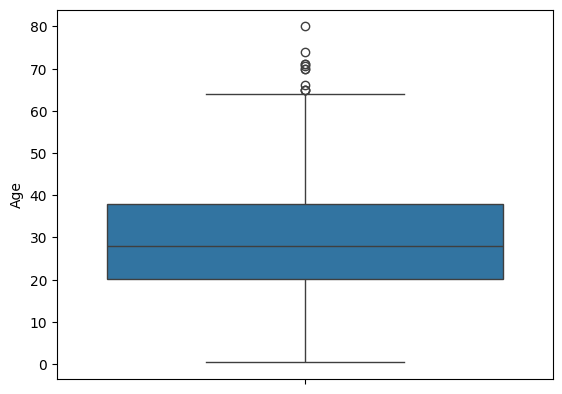

In [42]:
sns.boxplot(dt['Age'])

In [60]:
Q3=np.percentile(df['Age'],75,method='midpoint')
Q1=np.percentile(df['Age'],25,method='midpoint')

IndexError: index -1 is out of bounds for axis 0 with size 0

In [58]:
IQR=Q3-Q1

In [62]:
upper_limi=Q3+1.5*IQR
low_limi=Q1-1.5*IQR

In [63]:
outlier=[]

for x in df['Age']:
  if ((upper_limi)):
    outlier.append(x)

print(outlier)

[]


In [64]:
len(outlier)

0

In [65]:
df=df[(df["Age"]>low_limi) ]

In [69]:
df=df[(df["Age"])]

In [70]:
df.head()

""


In [68]:
df.shape

(0, 8)

In [91]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(5,10)


In [92]:
from sklearn.metrics import accuracy_score

In [93]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=dt["Survived"],random_state=42,test_size=0.2)

NameError: name 'y' is not defined

In [94]:
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric="minkowski",p=2)
  classifier.fit(x_train,y_train)
  knn_pred=classifier.predict(x_test)
  accuracy=accuracy_score(y_test,knn_pred)
  metric_k.append(accuracy)

NameError: name 'x_train' is not defined

ValueError: x and y must have same first dimension, but have shapes (5,) and (0,)

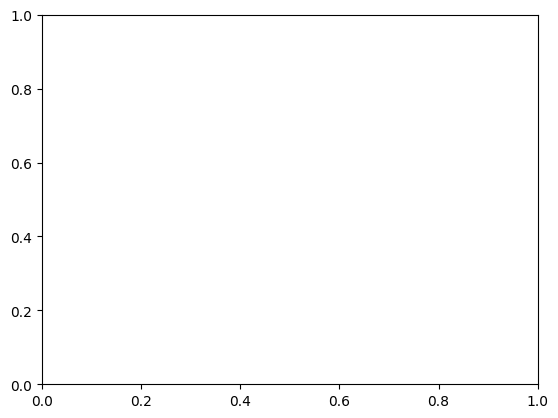

In [76]:
plt.plot(neighbors,metric_k,"o-")
plt.xlabel("neighbor")
plt.ylabel("Metric k")

In [77]:
classifier=KNeighborsClassifier(n_neighbors=7,metric="minkowski",p=2)
classifier.fit(x_train,y_train)
knn_pred=classifier.predict(x_test)

NameError: name 'x_train' is not defined

In [78]:
knn_pred

NameError: name 'knn_pred' is not defined

In [79]:
from sklearn.svm import SVC

In [80]:
parameters = {
    'C': [0.1, 0.5],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4]
}

In [81]:
from sklearn.model_selection import GridSearchCV
classi=SVC()
gcv=GridSearchCV(estimator=classi,param_grid=parameters)
gcv.fit(x_train,y_train)

NameError: name 'x_train' is not defined